# Брат брату брат
Мы изучаем пацанов

### Гипотезы
1. Среди пацанов преобладают мужчины
2. Пацаны - замкнутая группа и большая часть связей лежит внутри
3. Концентрация пацанов тяготеет к окраинам Москвы

In [1]:
import pymongo, json, matplotlib
client2 = pymongo.MongoClient('goto.reproducible.work')
pazans = json.loads(open('/home/oleg/coding/go-to-hack-main/share/pazan_publs.json').read())
users = {}
st = set()
for s in pazans.items():
    st.add(s[0])
for l in open('/home/oleg/coding/go-to-hack-main/share/source_data/users.json'):
    us = json.loads(l)
    if str(us['_id']) in st:
        users[us['_id']] = us
        users[us['_id']]['groups'] = pazans[str(us['_id'])]

In [7]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', family='DejaVu sans', size='50')
#print(lst[103])


In [3]:
data = pandas.DataFrame.from_dict(users,orient='index')
lst = list(users.items())
good_users = list(filter(lambda a: len(a[1]['groups'])>1, lst))
print(len(users))
print(len(good_users))

36275
12077


## Пол
Первый бин - девочки, второй бин - мальчики 

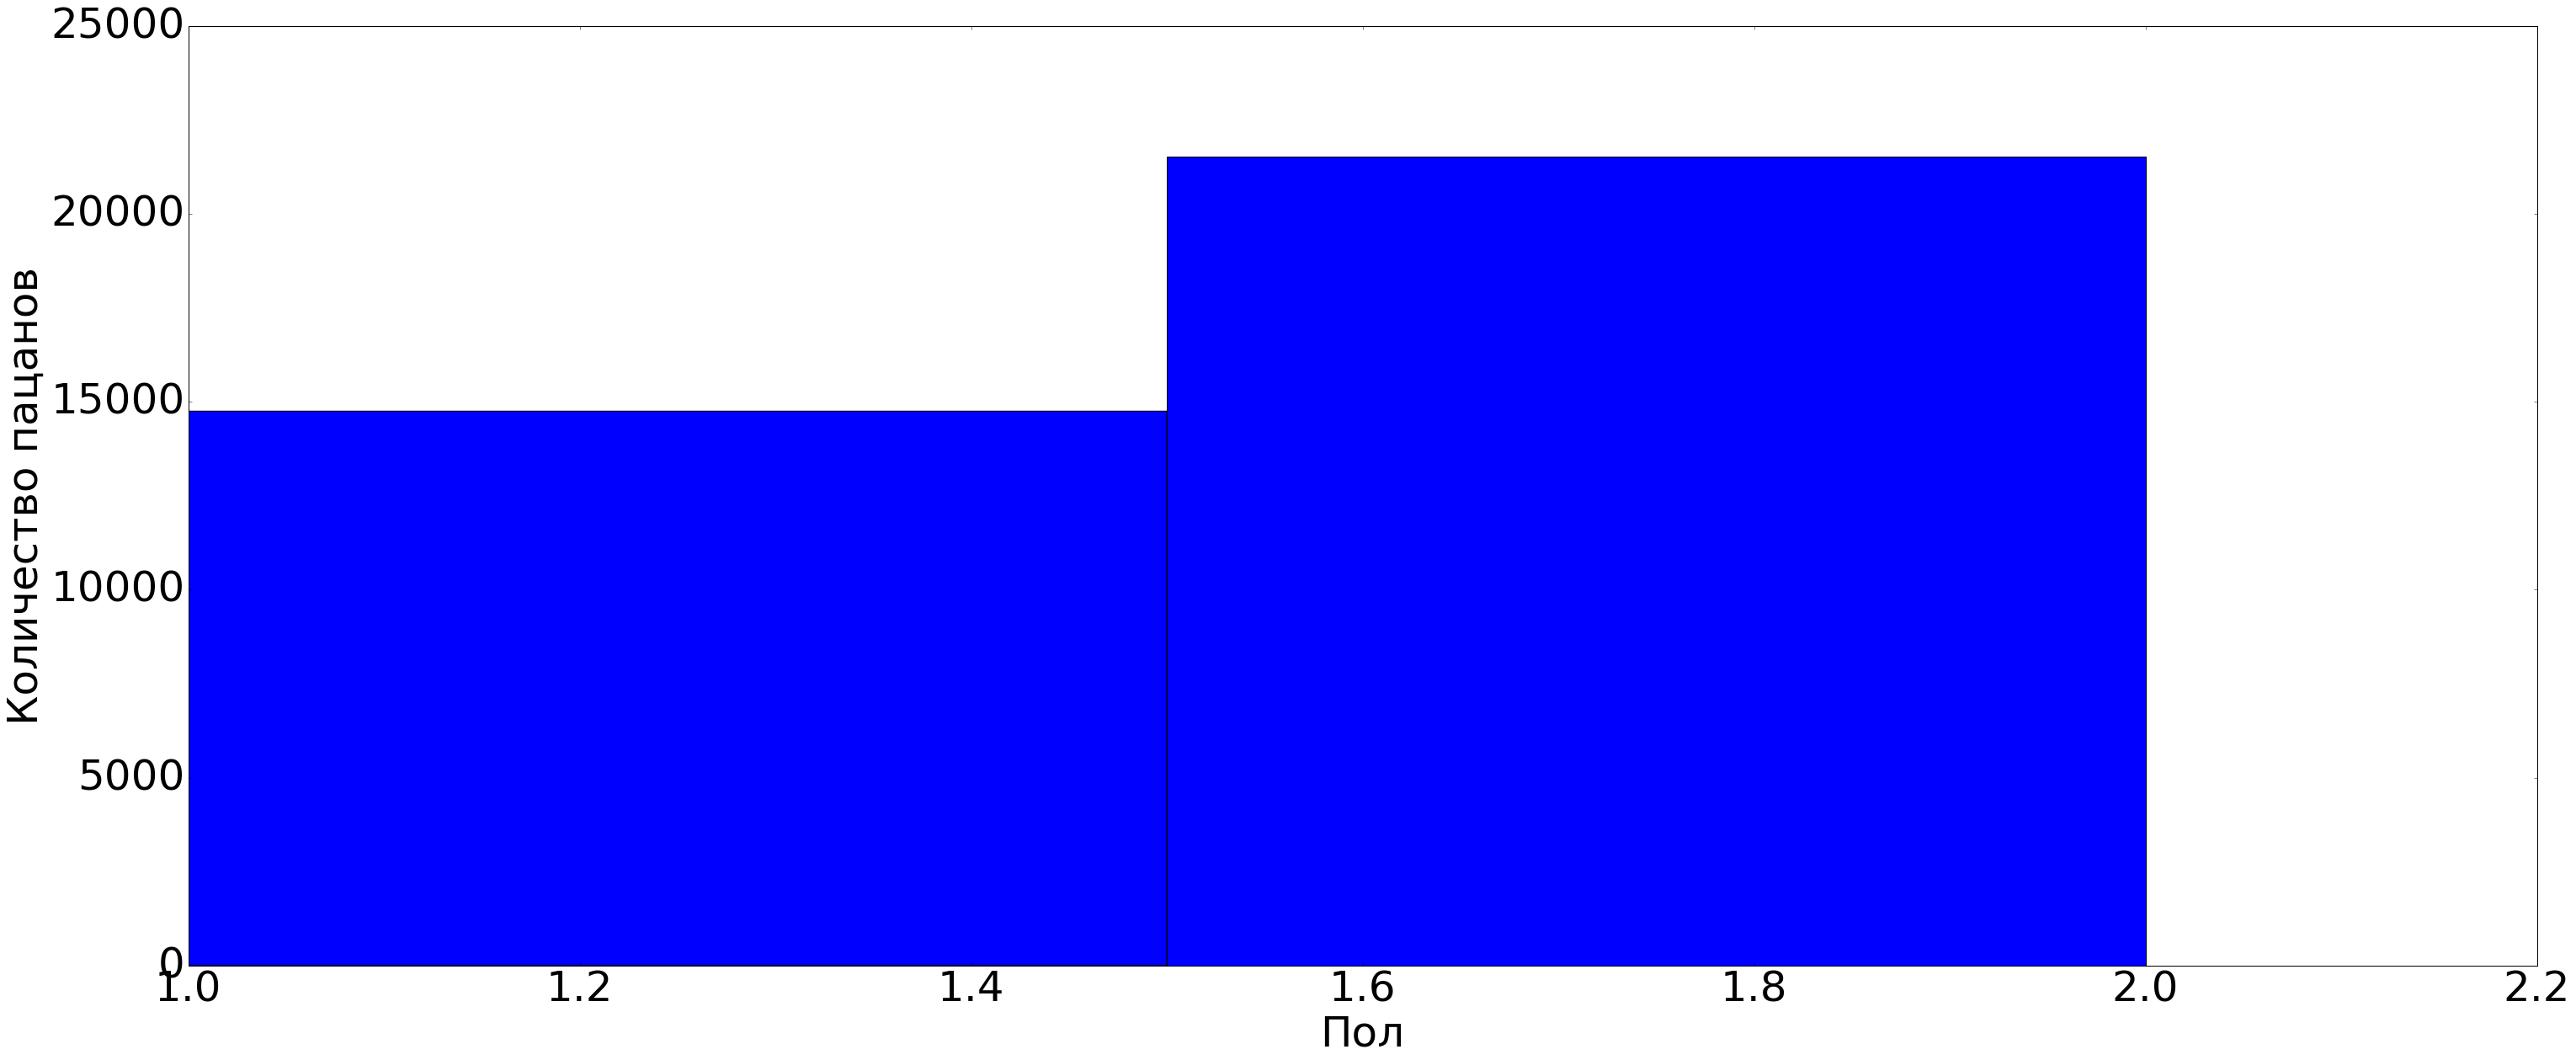

In [8]:
plt.figure(figsize=(50.0, 20.0))
plt.hist(data.sex, bins=2, range=(1, 2))
plt.savefig('gender.png')
plt.xlabel("Пол")
plt.ylabel("Количество пацанов")
plt.show()

Первая гипотеза опровергнута

## Количество цитатников
Давайте выясним количество людей, которые вступили как минимум в N групп 

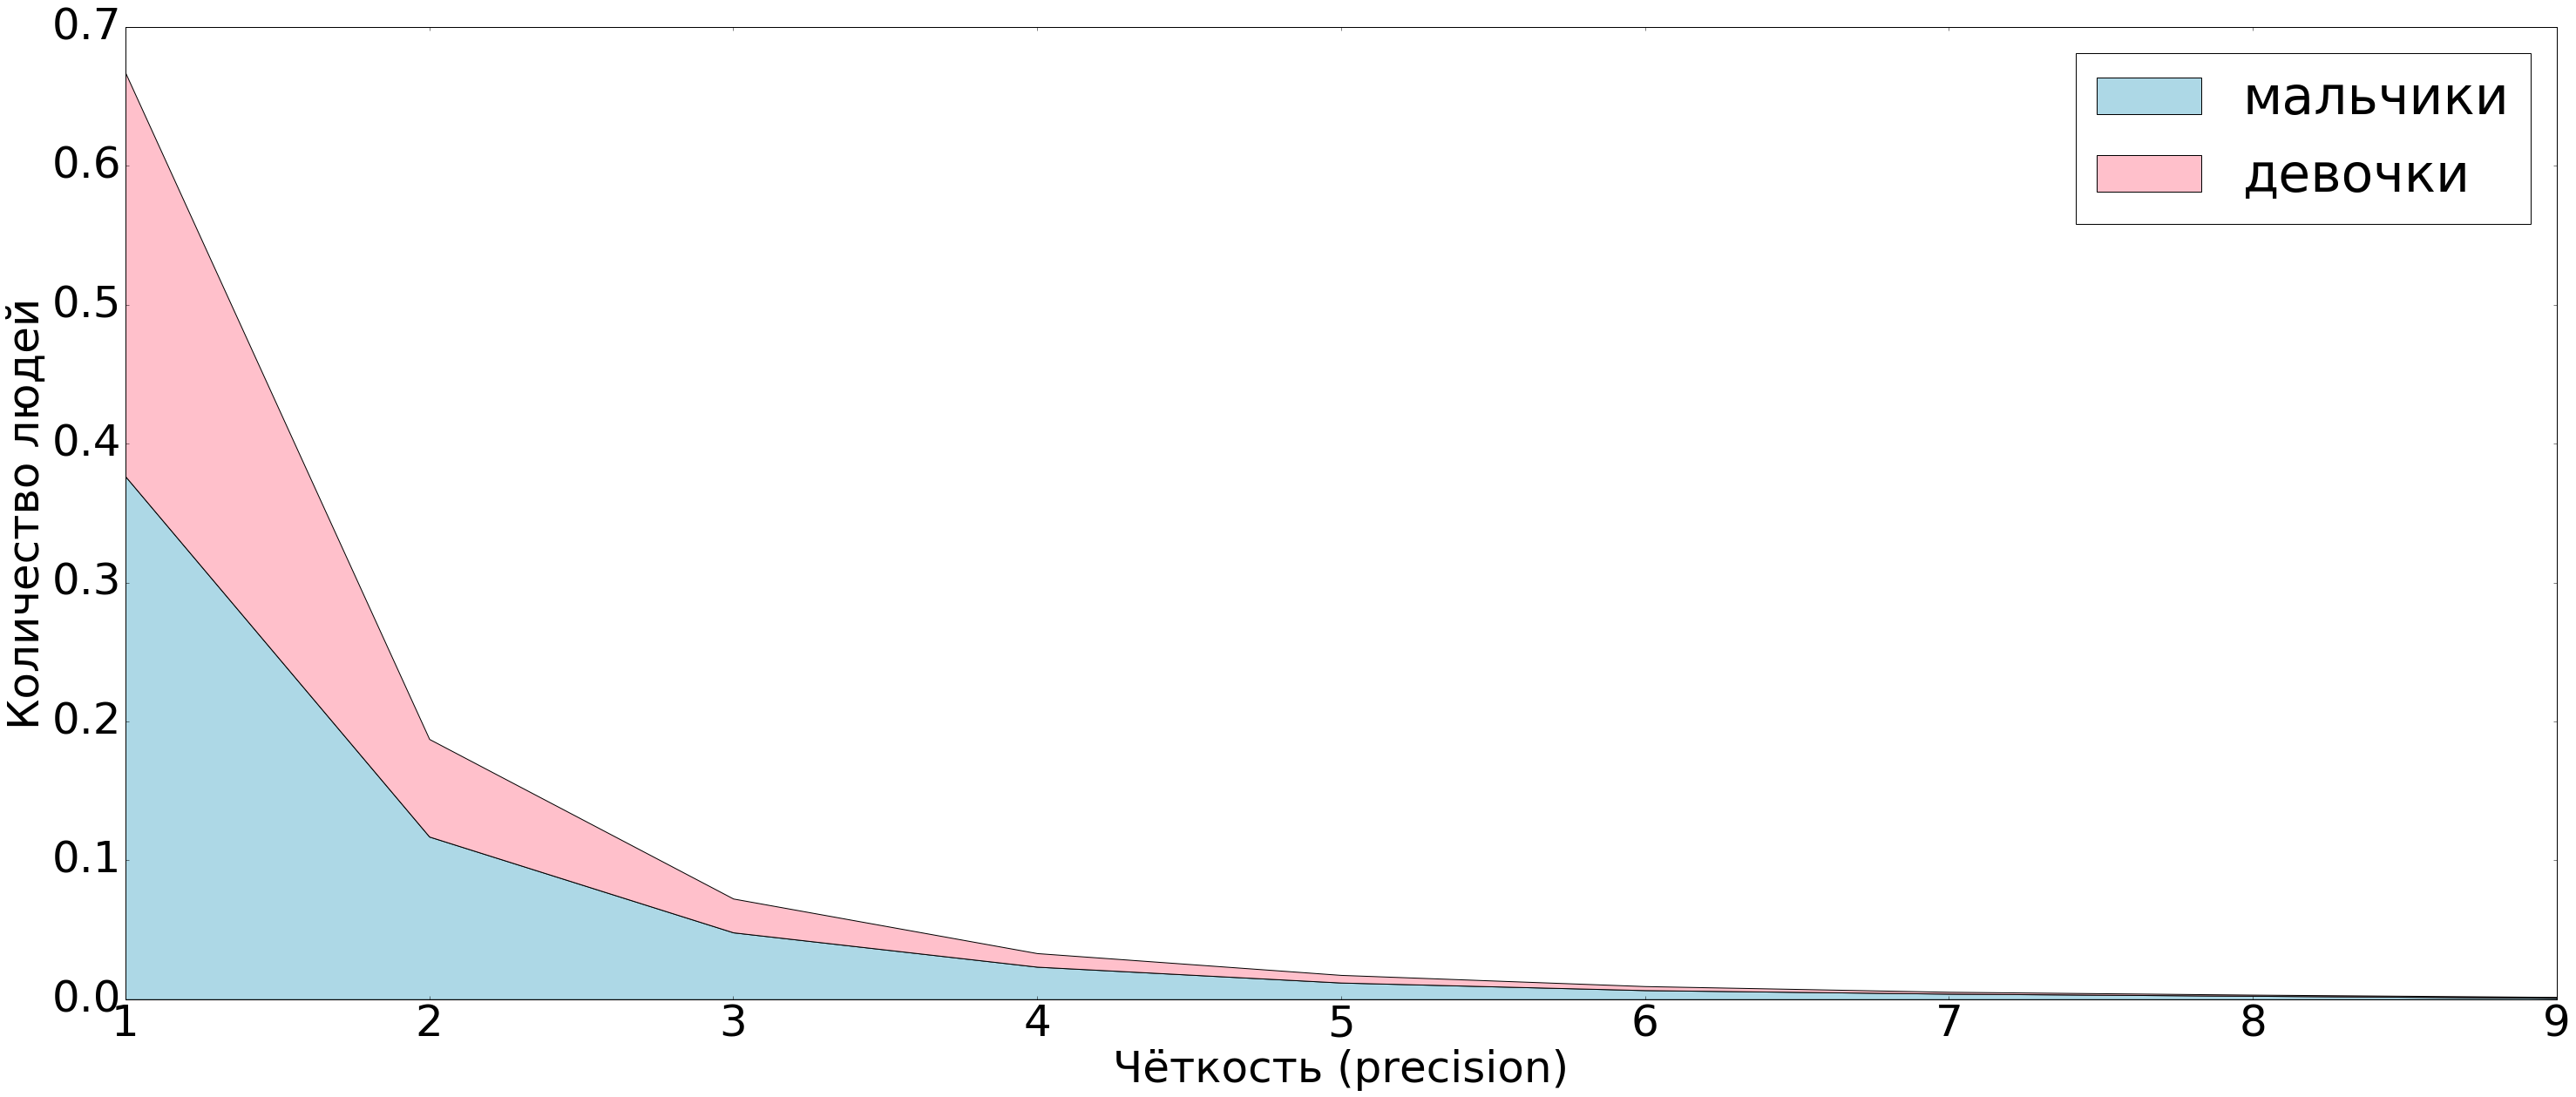

In [69]:
x = range(1, 10)
y = [len(list(filter(lambda a: len(a[1]['groups'])>=i, lst))) for i in x] 
y1 = [len(list(filter(lambda a: len(a[1]['groups'])==i and a[1]['sex']==1, lst)))/36275 for i in x] 
y2 = [len(list(filter(lambda a: len(a[1]['groups'])==i and a[1]['sex']==2, lst)))/36275 for i in x] 

# plt.plot(x,y, label='общее')
# plt.plot(x,y1, label='нетру пацаны (девочки)')
# plt.plot(x,y2, label='тру пацаны (мальчики)')

import matplotlib.gridspec as gridspec

#f = plt.figure()


f, ax = plt.subplots()

ax.stackplot(x, y2, y1, colors=('#add8e6', 'pink'), )

f.set_figheight(20)
f.set_figwidth(50)


plt.xlabel("Чёткость (precision)")
plt.ylabel("Количество людей")
plt.legend(['мальчики', 'девочки'])
plt.savefig('groups.png')
plt.show()


## Отношение к вредным привычкам
Отношение к вредным привычкам тем лучше, чем больше цифра по оси x

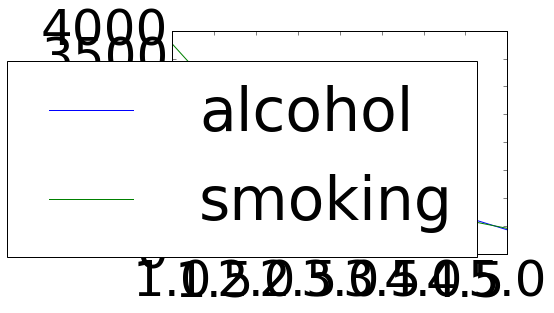

In [45]:
x = range(1, 6)
y1 = [len(list(filter(lambda a: ('personal' in a[1]) and 
                      ('alcohol' in a[1]['personal']) and a[1]['personal']['alcohol']==i, lst))) for i in x]  
y2 = [len(list(filter(lambda a: ('personal' in a[1]) and
                      ('smoking' in a[1]['personal']) and a[1]['personal']['smoking']==i, lst))) for i in x]  

#plt.figure(figsize=(20.0, 20.0))
plt.plot(x,y1, label='alcohol')
plt.plot(x,y2, label='smoking')

plt.legend()
plt.figure(figsize=(20.0, 20.0))
plt.show()

In [138]:

#print(json.dumps(lst[0], encoding='utf-8'))
keywords = {
    #'падик': 0,
    'адик': 0,
    #'найк': 0,
    #'adidas': 0,
    'nike': 0,
    'брат': 0,
    'пацан': 0,
    'пацан': 0,
    'мама': 0,
    #'двор': 0,
    'учеба': 0,
    'вообще': 0,
    #'искусство': 0,
    #'бухл': 0,

}
puper_list = lst[0:1000]

cnt = 0
print(client2['vk'].collection_names())
walls = client2['vk']['walls']
print()
for u in puper_list:
    string = str(u).lower()
    
    wall_str = walls.find_one({'_id': u[1]['_id']})
    azaza = False
    if 'response' in wall_str:
        azaza = True
        wall_str = wall_str['response']['items']
        #print(wall_str)
        #wall_str = str(wall_str)
        #print(wall_str)
        #vk_login, vk_password = sys.argv[1], sys.argv[2]
        if(cnt%100==0):
            print(cnt)
        cnt+=1
        for w in keywords:
            if (w in string):
                keywords[w]+=1
            else:
                for wall_post in wall_str:
                    if (w in wall_post['text'].lower()):
                        keywords[w]+=1
print(keywords)

['audio', 'users', 'friends', 'system.users', 'walls']

0
100
200
300
400
500
600
700
{'брат': 72, 'мама': 18, 'учеба': 3, 'пацан': 15, 'nike': 2, 'адик': 1, 'вообще': 13}


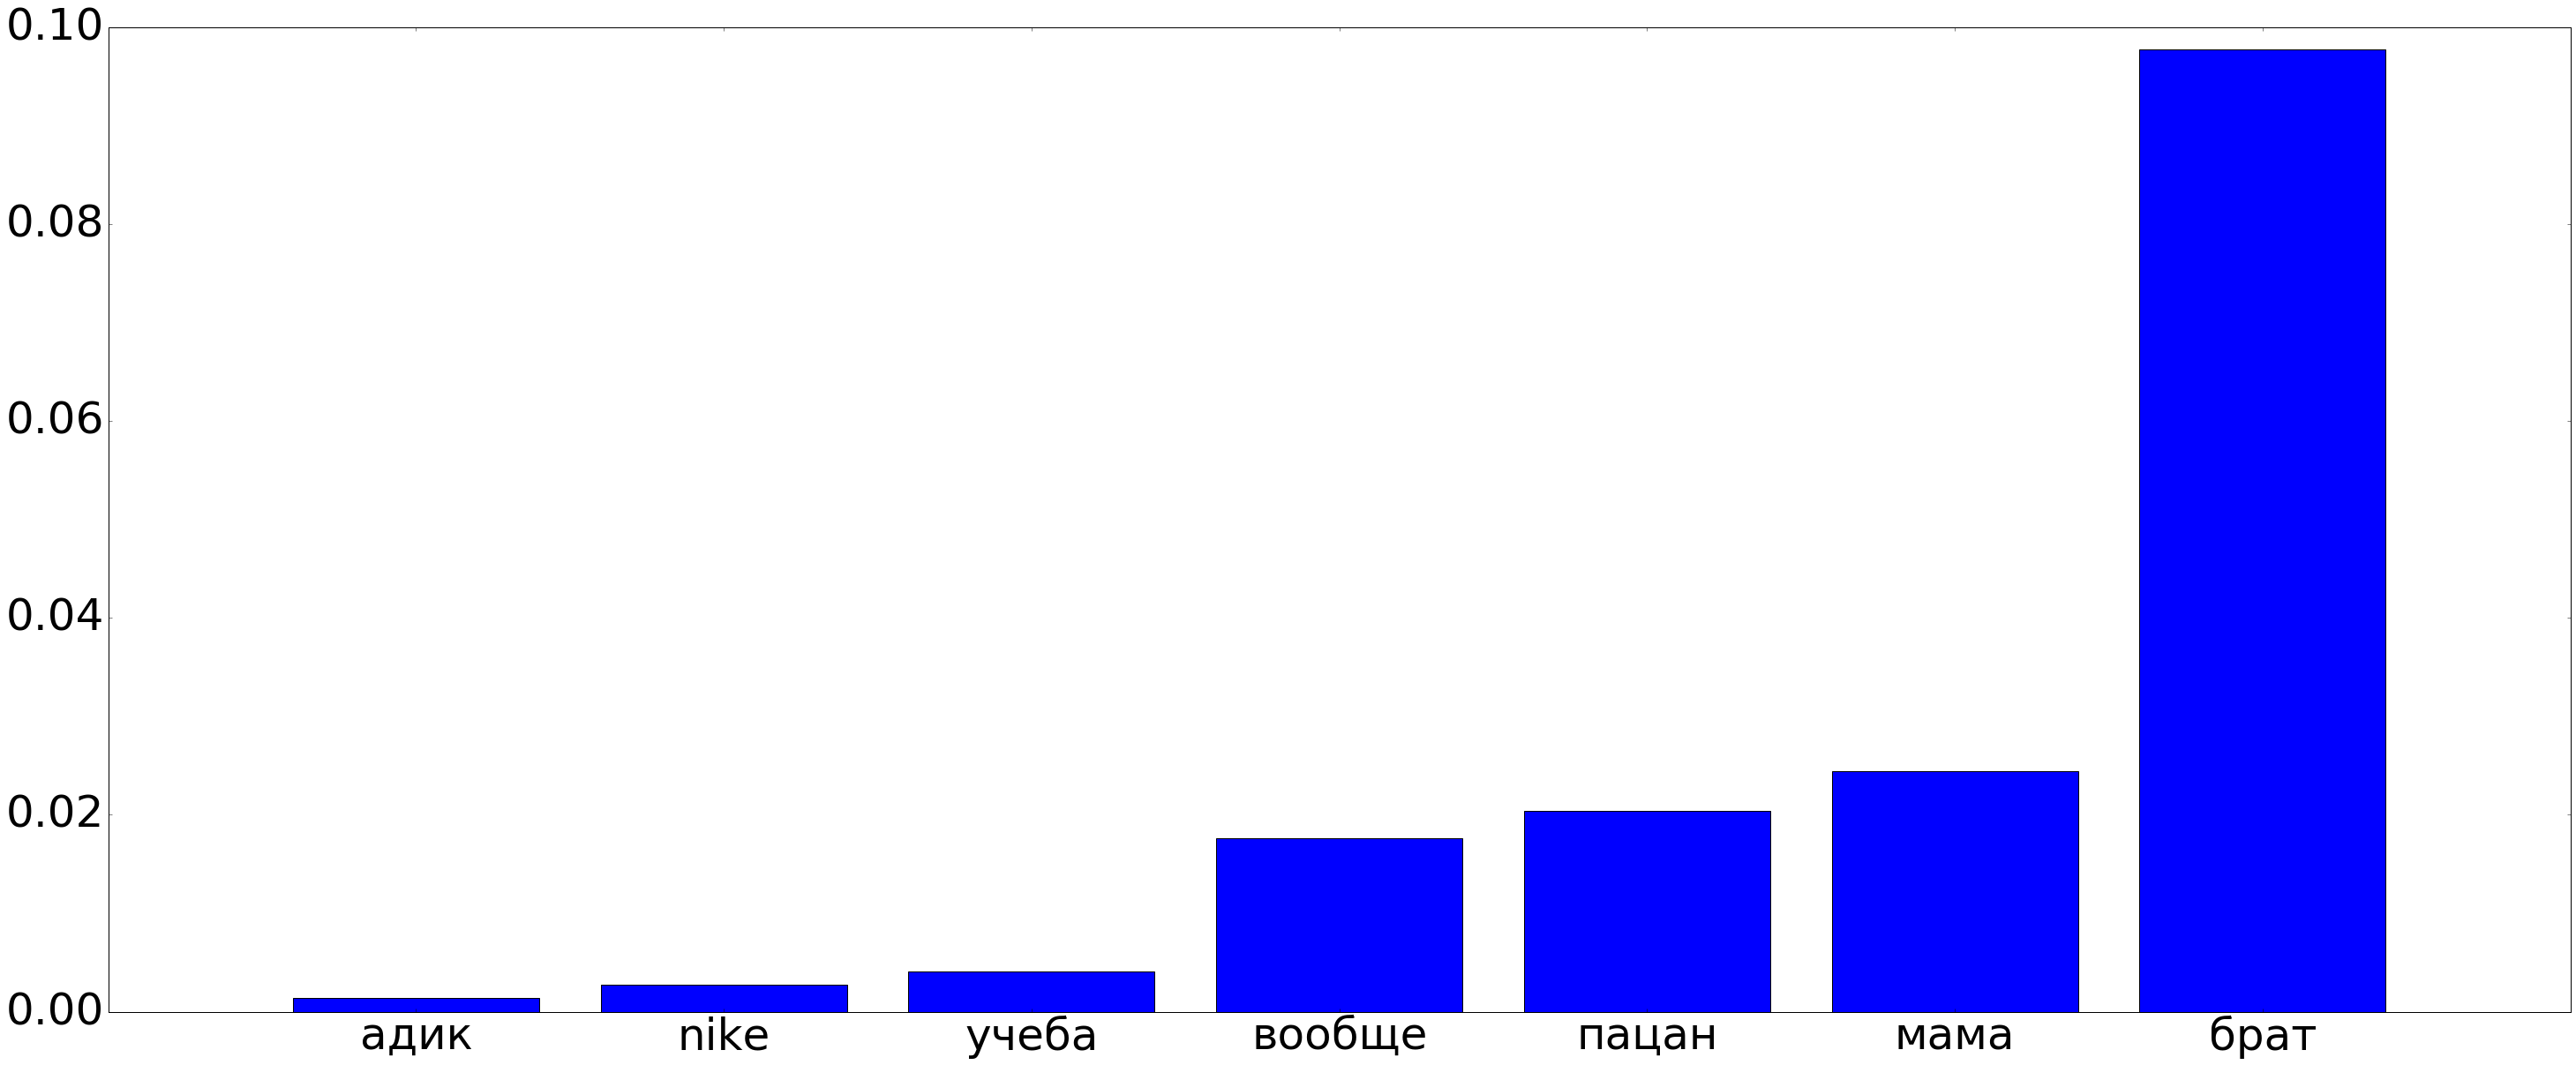

In [139]:
plt.figure(figsize=(50.0, 20.0))
ad = 0

items = sorted(keywords.items(), key=lambda a: a[1])
keys = [a[0] for a in items]
values = [a[1]/cnt  for a in items]
plt.bar(range(len(values)), values, align='center')
plt.xticks(range(len(keys)), keys)
plt.savefig('words.png')
plt.show()

{0: 1.8, 1: 1.974141677531508, 2: 1.9860041987403778, 3: 2.03770197486535, 4: 2.1344827586206896, 5: 2.1366906474820144, 6: 2.1044776119402986, 7: 2.1914893617021276}


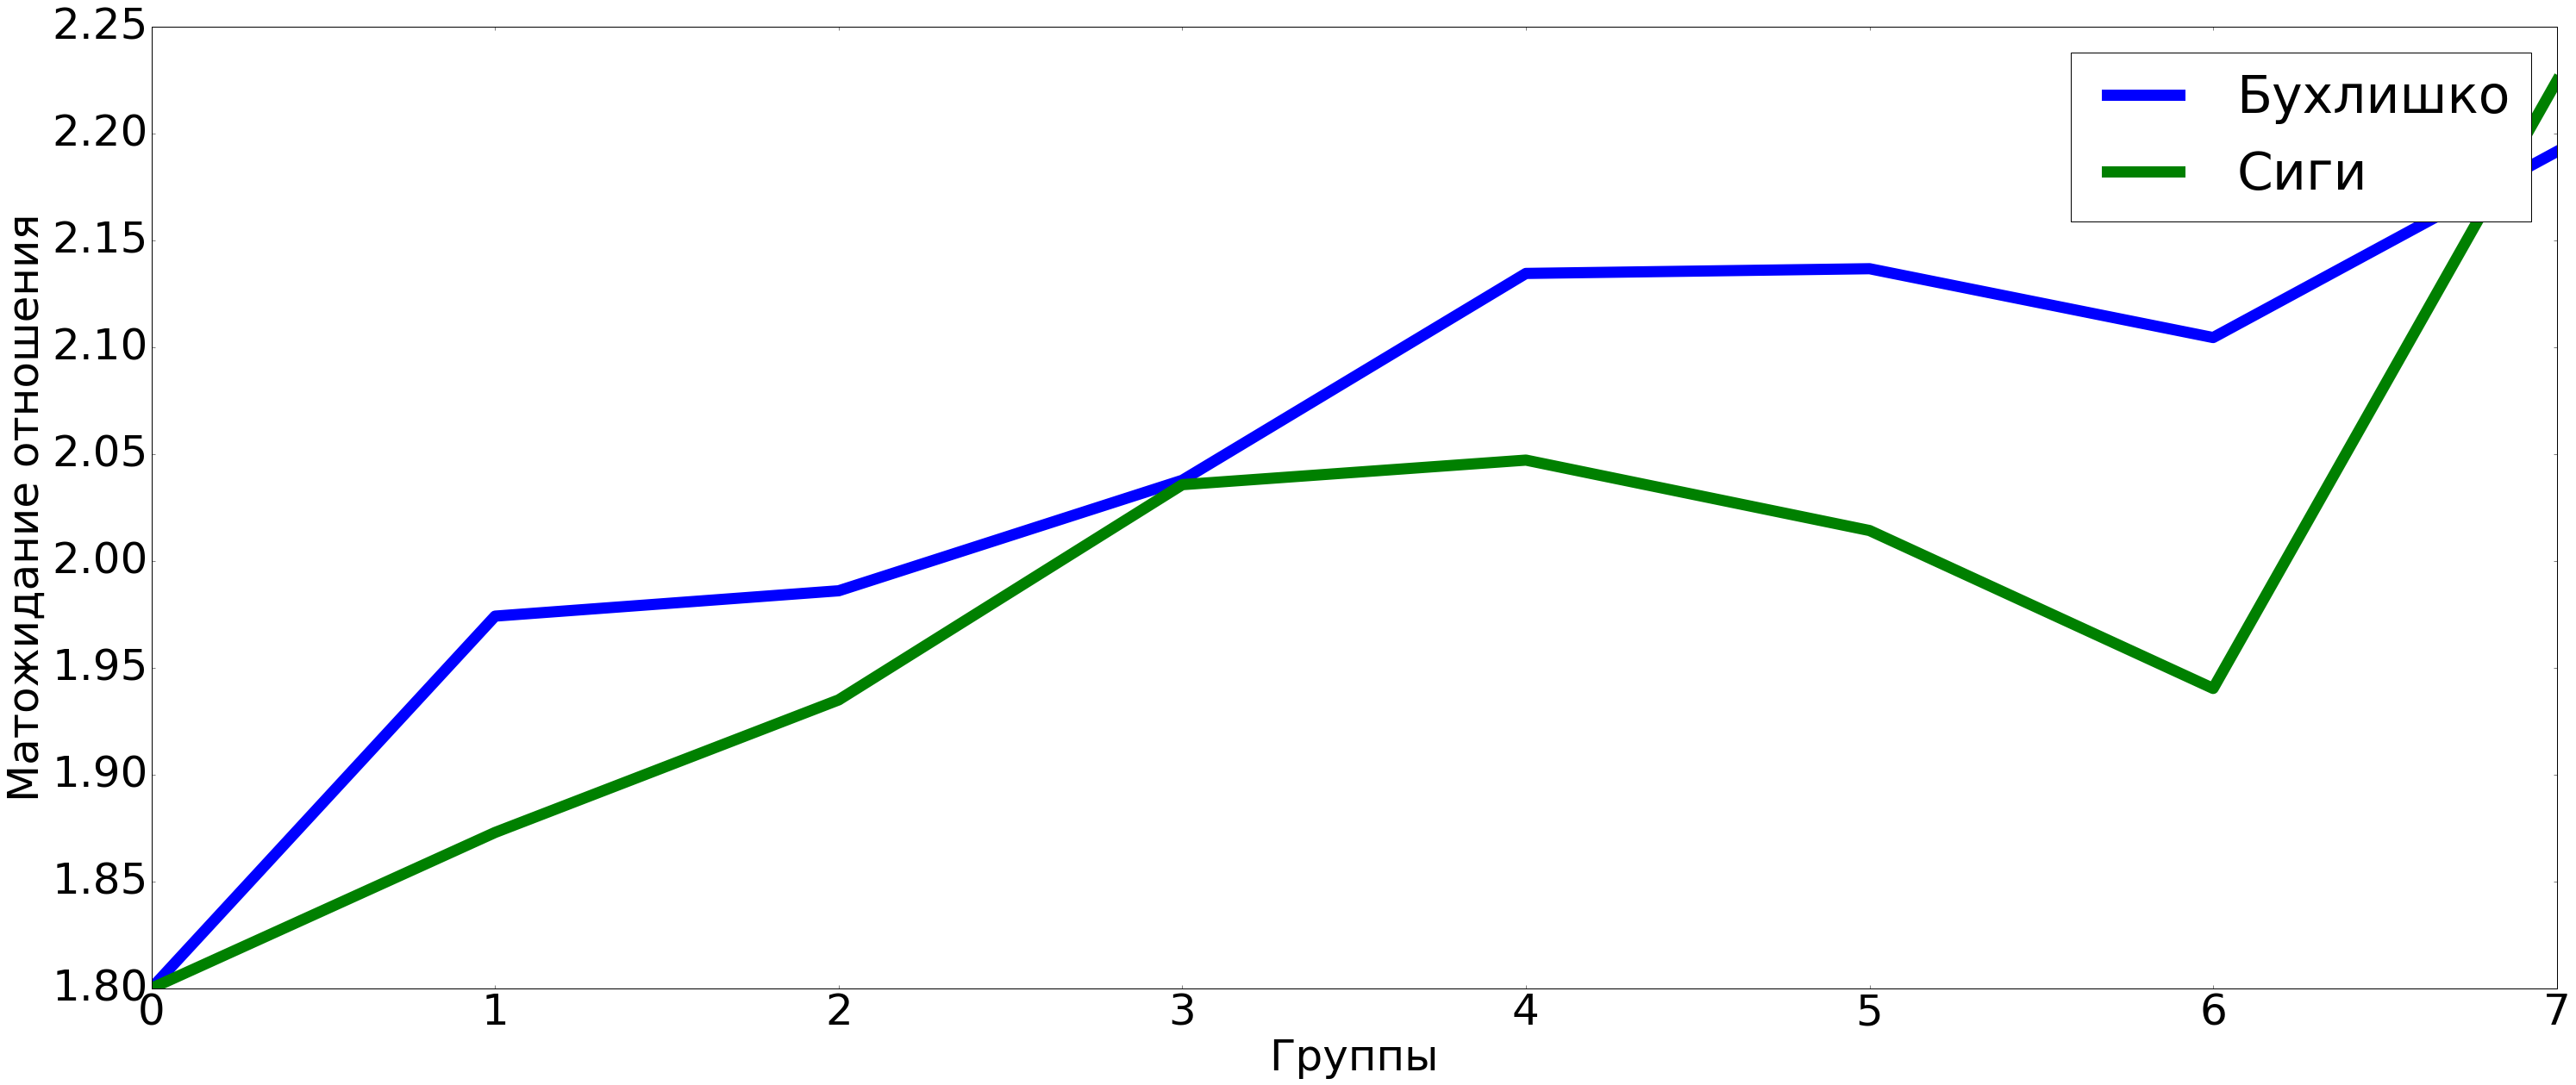

In [88]:
plt.figure(figsize=(50.0, 20.0))
groups_alc = {}
cnt_alc = {}
groups_smo = {}
cnt_smo = {}
r_gr = range(0, 8)
for i in r_gr:
    groups_alc[i] = 0
    cnt_alc[i] = 0
    groups_smo[i] = 0
    cnt_smo[i] = 0

for u in lst:
    if len(u[1]['groups']) in r_gr:
        if ('personal' in u[1]) and ('alcohol' in u[1]['personal']):
            groups_alc[len(u[1]['groups'])]+=u[1]['personal']['alcohol']
            cnt_alc[len(u[1]['groups'])]+=1
        if ('personal' in u[1]) and ('smoking' in u[1]['personal']):
            groups_smo[len(u[1]['groups'])]+=u[1]['personal']['smoking']
            cnt_smo[len(u[1]['groups'])]+=1

for i in r_gr:
    if cnt_alc[i]!=0:
        groups_alc[i] /= cnt_alc[i] 
    if cnt_smo[i]!=0:
        groups_smo[i] /= cnt_smo[i] 
groups_alc[0] = groups_smo[0] = 1.8

print(groups_alc)
plt.plot(r_gr,list(groups_alc.values()), linewidth=13,label='Бухлишко')
plt.plot(r_gr,list(groups_smo.values()), linewidth=13,label='Сиги')
    
# plt.scatter(x,y, alpha = 0.01) #изменения только в этой строчке

plt.xlabel("Группы")
plt.ylabel("Матожидание отношения")
plt.legend()
plt.savefig('expect.png')
plt.show()

In [334]:
usCol = client2['vk'].users

In [356]:
super_groups = {}
cnt = 0

keys = set()
for a in good_users:
    keys.add(a[0]) 
print("Keys")
for l in open('/home/oleg/coding/go-to-hack-main/share/resulting_groups.json'):
    gr = json.loads(l)
    per_id = gr[0]
    if per_id in keys:
        for g in gr[1]:
            if g not in super_groups:
                super_groups[g] = 0
            super_groups[g]+=1
        cnt+=1
        if(cnt%1000==0):
            print("Done: %s: " % cnt)
super_groups = sorted(list(super_groups.items()), key=lambda a: -a[1])
print(super_groups[0:30])
    

Keys
Done: 1000: 
Done: 2000: 
Done: 3000: 
Done: 4000: 
Done: 5000: 
Done: 6000: 
Done: 7000: 
Done: 8000: 
Done: 9000: 
Done: 10000: 
Done: 11000: 
Done: 12000: 
[(32194500, 6546), (40567146, 5622), (31836774, 5387), (26419239, 5310), (12382740, 5015), (23064236, 4957), (26147450, 4711), (30277672, 4480), (10639516, 4425), (34491673, 4135), (25554967, 4100), (30179569, 3994), (45045130, 3975), (65662695, 3844), (56048543, 3726), (33339790, 3712), (22741624, 3595), (68114884, 3434), (30602036, 3317), (38630769, 3313), (45441631, 3291), (23243883, 3276), (42701798, 3272), (78388911, 3259), (46987089, 3223), (39111205, 3167), (29435908, 3162), (45739071, 3153), (45595714, 3135), (22822305, 3107)]
